In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# read data
df = pd.read_csv('D:\BTL_Python_data\Khánh - Visualization\Data\FleetJourney.csv')
df.head()

,SENDERS_DATE,RECEIVERS_DATE,TRANSPORTATION_DISTANCE_IN_KM,ontime,delay,PREDICTED_DELIVERED_DATE,vehicle_no,vehicleType,Driver_Name,Driver_MobileNo,...,Material Shipped,order_id,order_id_date,vehicle_no.1,PLACE_OF_SENDERS,PLACE_OF_RECEIVERS 1,PLACE_OF_RECEIVERS 2,PLACE_OF_RECEIVERS 3,Customer Fname,Customer Lname
0,18/05/2021,28/06/2021,320.0,No,Yes,30/06/2021,KA590408,Mahindra LCV 1MT,RAMESH,7082423013,...,BRACKET / GRAB HANDLE,d792cb16214,15/05/2021,KA590408,New York,Chincoteague Island,Fort Wayne,Mesa,Mary,Smith
1,18/05/2021,28/06/2021,103.0,Yes,No,30/06/2021,TN30BC5917,Mahindra LCV 1MT,RAMESH,7082423014,...,ZB MODEL PLATE / 3143,0d7a144bdd3,15/05/2021,TN30BC5917,San Jose,Exmore,Newark,Garland,Hannah,Smith
2,11/4/2021,22/05/2021,300.0,Yes,No,24/05/2021,TN22AR2748,Mahindra LCV 1MT,GIRI,7082423015,...,LETTERING / FUSO,57da4fc703e,8/4/2021,TN22AR2748,Birmingham,Lawrenceville,Arlington,Scottsdale,Mary,Nelson
3,19/05/2021,29/06/2021,61.0,Yes,No,29/06/2021,TN28AQ0781,Mahindra LCV 1MT,RAVI,7082423016,...,LU STRUT RA / RADIUS ROD,1b038114c75,16/05/2021,TN28AQ0781,San Jose,Midlothian,Fort Wayne,Plano,Austin,Sexton
4,18/05/2021,28/06/2021,240.0,Yes,No,28/06/2021,TN68F1722,Mahindra LCV 1MT,TAMIL,7082423017,...,WISHBONE / V ROD/HDT,bb4e55b4fd9,15/05/2021,TN68F1722,Boston,Virginia Beach,Baton Rouge,Garland,Michael,Scott


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SENDERS_DATE                   10005 non-null  object 
 1   RECEIVERS_DATE                 10005 non-null  object 
 2   TRANSPORTATION_DISTANCE_IN_KM  10005 non-null  float64
 3   ontime                         10005 non-null  object 
 4   delay                          10005 non-null  object 
 5   PREDICTED_DELIVERED_DATE       10005 non-null  object 
 6   vehicle_no                     10005 non-null  object 
 7   vehicleType                    10005 non-null  object 
 8   Driver_Name                    10005 non-null  object 
 9   Driver_MobileNo                10005 non-null  int64  
 10  customer_id                    10005 non-null  object 
 11  supplierID                     10005 non-null  object 
 12  supplierNameCode               10005 non-null 

In [4]:
vehicle_no= df[['vehicle_no']]
# seperate first 2 characters
vehicle_no['first_char'] = vehicle_no['vehicle_no'].str.get(0)
vehicle_no['second_char'] = vehicle_no['vehicle_no'].str.get(1)
# merge 2 characters to create 'fleet_id'
vehicle_no['fleet_id'] = vehicle_no['first_char'].astype(str) + vehicle_no['second_char'].astype(str)
# drop 2 columns:'first_char' and 'second_char'
vehicle_no = vehicle_no.drop(['first_char','second_char'], axis=1)
vehicle_no

C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\484382183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_no['first_char'] = vehicle_no['vehicle_no'].str.get(0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\484382183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_no['second_char'] = vehicle_no['vehicle_no'].str.get(1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\484382183.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,vehicle_no,fleet_id
0,KA590408,KA
1,TN30BC5917,TN
2,TN22AR2748,TN
3,TN28AQ0781,TN
4,TN68F1722,TN
...,...,...
10000,AP13X6670,AP
10001,AP13X6671,AP
10002,AP13X6672,AP
10003,AP13X6673,AP


In [5]:
df=df.join(vehicle_no['fleet_id'])
df

,SENDERS_DATE,RECEIVERS_DATE,TRANSPORTATION_DISTANCE_IN_KM,ontime,delay,PREDICTED_DELIVERED_DATE,vehicle_no,vehicleType,Driver_Name,Driver_MobileNo,...,order_id,order_id_date,vehicle_no.1,PLACE_OF_SENDERS,PLACE_OF_RECEIVERS 1,PLACE_OF_RECEIVERS 2,PLACE_OF_RECEIVERS 3,Customer Fname,Customer Lname,fleet_id
0,18/05/2021,28/06/2021,320.0,No,Yes,30/06/2021,KA590408,Mahindra LCV 1MT,RAMESH,7082423013,...,d792cb16214,15/05/2021,KA590408,New York,Chincoteague Island,Fort Wayne,Mesa,Mary,Smith,KA
1,18/05/2021,28/06/2021,103.0,Yes,No,30/06/2021,TN30BC5917,Mahindra LCV 1MT,RAMESH,7082423014,...,0d7a144bdd3,15/05/2021,TN30BC5917,San Jose,Exmore,Newark,Garland,Hannah,Smith,TN
2,11/4/2021,22/05/2021,300.0,Yes,No,24/05/2021,TN22AR2748,Mahindra LCV 1MT,GIRI,7082423015,...,57da4fc703e,8/4/2021,TN22AR2748,Birmingham,Lawrenceville,Arlington,Scottsdale,Mary,Nelson,TN
3,19/05/2021,29/06/2021,61.0,Yes,No,29/06/2021,TN28AQ0781,Mahindra LCV 1MT,RAVI,7082423016,...,1b038114c75,16/05/2021,TN28AQ0781,San Jose,Midlothian,Fort Wayne,Plano,Austin,Sexton,TN
4,18/05/2021,28/06/2021,240.0,Yes,No,28/06/2021,TN68F1722,Mahindra LCV 1MT,TAMIL,7082423017,...,bb4e55b4fd9,15/05/2021,TN68F1722,Boston,Virginia Beach,Baton Rouge,Garland,Michael,Scott,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,19/04/2021,30/05/2021,31.0,No,Yes,1/6/2021,AP13X6670,41 FT Flat Bed Double-Axle 21MT - Trailer,thippaswamy nayak K T,9036703937,...,57f78c2d0d1,16/04/2021,AP13X6670,San Jose,Johnson City,Charlotte,Garland,Teresa,Black,AP
10001,20/04/2021,31/05/2021,32.0,No,Yes,2/6/2021,AP13X6671,42 FT Flat Bed Double-Axle 21MT - Trailer,thippaswamy nayak K T,9036703938,...,57f78c2d0d2,17/04/2021,AP13X6671,San Jose,Johnson City,Charlotte,Garland,Heather,Smith,AP
10002,21/04/2021,1/6/2021,33.0,No,Yes,3/6/2021,AP13X6672,43 FT Flat Bed Double-Axle 21MT - Trailer,thippaswamy nayak K T,9036703939,...,57f78c2d0d3,18/04/2021,AP13X6672,San Jose,Johnson City,Charlotte,Garland,Minerva,Gregory,AP
10003,22/04/2021,2/6/2021,34.0,No,Yes,4/6/2021,AP13X6673,44 FT Flat Bed Double-Axle 21MT - Trailer,thippaswamy nayak K T,9036703940,...,57f78c2d0d5,20/04/2021,AP13X6674,San Jose,Johnson City,Charlotte,Garland,Betty,Smith,AP


In [6]:
df1=df[df['fleet_id']=='TN']
df1

,SENDERS_DATE,RECEIVERS_DATE,TRANSPORTATION_DISTANCE_IN_KM,ontime,delay,PREDICTED_DELIVERED_DATE,vehicle_no,vehicleType,Driver_Name,Driver_MobileNo,...,order_id,order_id_date,vehicle_no.1,PLACE_OF_SENDERS,PLACE_OF_RECEIVERS 1,PLACE_OF_RECEIVERS 2,PLACE_OF_RECEIVERS 3,Customer Fname,Customer Lname,fleet_id
1,18/05/2021,28/06/2021,103.0,Yes,No,30/06/2021,TN30BC5917,Mahindra LCV 1MT,RAMESH,7082423014,...,0d7a144bdd3,15/05/2021,TN30BC5917,San Jose,Exmore,Newark,Garland,Hannah,Smith,TN
2,11/4/2021,22/05/2021,300.0,Yes,No,24/05/2021,TN22AR2748,Mahindra LCV 1MT,GIRI,7082423015,...,57da4fc703e,8/4/2021,TN22AR2748,Birmingham,Lawrenceville,Arlington,Scottsdale,Mary,Nelson,TN
3,19/05/2021,29/06/2021,61.0,Yes,No,29/06/2021,TN28AQ0781,Mahindra LCV 1MT,RAVI,7082423016,...,1b038114c75,16/05/2021,TN28AQ0781,San Jose,Midlothian,Fort Wayne,Plano,Austin,Sexton,TN
4,18/05/2021,28/06/2021,240.0,Yes,No,28/06/2021,TN68F1722,Mahindra LCV 1MT,TAMIL,7082423017,...,bb4e55b4fd9,15/05/2021,TN68F1722,Boston,Virginia Beach,Baton Rouge,Garland,Michael,Scott,TN
5,21/05/2021,1/7/2021,70.0,Yes,No,1/7/2021,TN88A4980,Mahindra LCV 1MT,GANESH,7082423018,...,2a0634bc1ea,18/05/2021,TN88A4980,San Jose,Midlothian,Baton Rouge,Plano,Mary,Olson,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,28/12/2021,7/2/2022,70.0,No,Yes,9/2/2022,TN18AB5080,40 FT 3XL Trailer 35MT,MANAS BARAD,6371406742,...,14763eea124,25/12/2021,TN18AB5080,New York,Lake Mary,Fort Wayne,El Paso,Mary,Smith,TN
9917,10/11/2021,21/12/2021,177.0,No,Yes,23/12/2021,TN04M5355,40 FT Flat Bed Multi-Axle 27MT - Trailer,SAHIB KHAN,9602254786,...,7bfab56e576,7/11/2021,TN04M5355,San Jose,Hendersonville,Newark,Scottsdale,Ronald,Hanson,TN
9918,20/08/2021,30/09/2021,177.0,No,Yes,2/10/2021,TN04AH7817,40 FT 3XL Trailer 35MT,JAYAGOPAL,8344885873,...,89c73cdf380,17/08/2021,TN04AH7817,New York,Gainesville,Fort Wayne,Lincoln,Mary,Nichols,TN
9919,14/12/2021,24/01/2022,35.0,No,Yes,26/01/2022,TN32M1559,40 FT 3XL Trailer 35MT,V.ELUMALAI,8610527652,...,ad07836befb,11/12/2021,TN32M1559,San Jose,Lake Mary,Charlotte,Mesa,Lisa,Edwards,TN


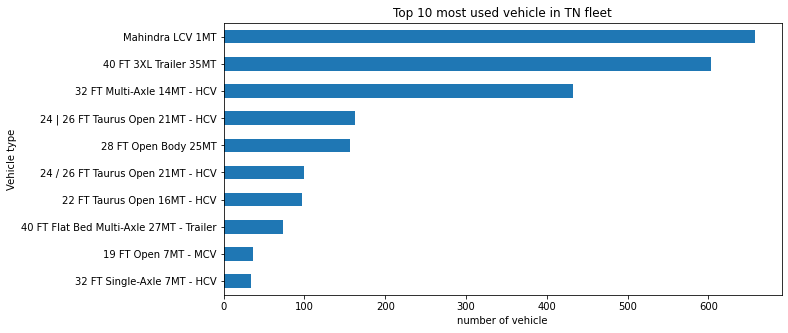

In [7]:
df1.vehicleType.value_counts().head(10).plot(kind='barh', figsize=(10,5))
plt.xlabel('number of vehicle')
plt.ylabel('Vehicle type')
plt.title('Top 10 most used vehicle in TN fleet')
plt.gca().invert_yaxis()
plt.show()

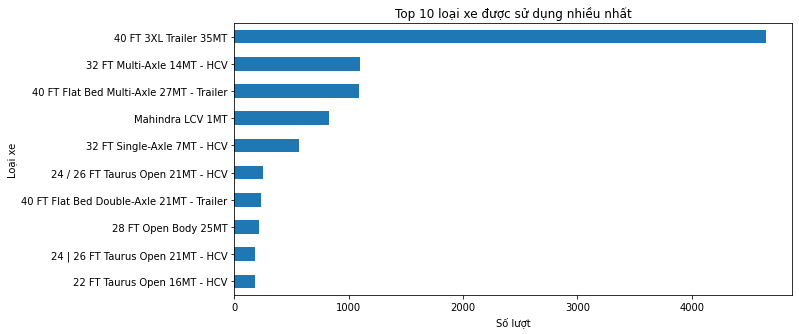

In [8]:
# biểu đồ top 10 xe được sử dụng nhiều nhất
df.vehicleType.value_counts().head(10).plot(kind='barh', figsize=(10,5))
plt.xlabel('Số lượt')
plt.ylabel('Loại xe')
plt.title('Top 10 loại xe được sử dụng nhiều nhất')
plt.gca().invert_yaxis()
plt.show()

Nhận xét: xe '40 FT 3XL Trailer 35MT' được sử dụng nhiều nhất với khoảng 4500 lượt, sau đó là các xe như '32 FT Multi-Axle 14MT - HCV', '40 FT Flat Bed Multi-Axle 27MT - Trailer', ... với tần suất mỗi xe chưa đến 1500 lượt

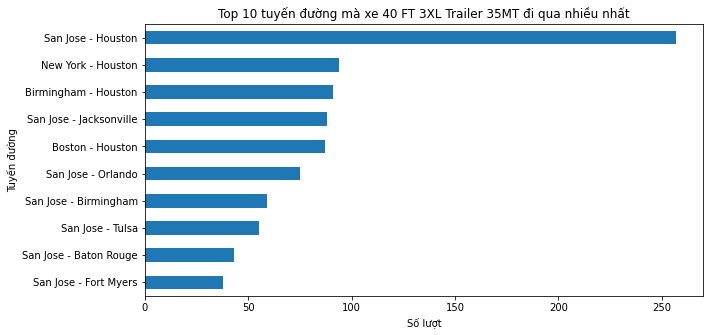

In [9]:
# tạo tuyến đường từ PLACE_OF_SENDERS và PLACE_OF_RECEIVERS 1
df['route'] = df['PLACE_OF_SENDERS'] + ' - ' + df['PLACE_OF_RECEIVERS 1']
# top 10 tuyến đường mà xe '40 FT 3XL Trailer 35MT' đi qua nhiều nhất
df[df['vehicleType'] == '40 FT 3XL Trailer 35MT'].route.value_counts().head(10).plot(kind='barh', figsize=(10,5))
plt.xlabel('Số lượt')
plt.ylabel('Tuyến đường')
plt.title('Top 10 tuyến đường mà xe 40 FT 3XL Trailer 35MT đi qua nhiều nhất')
plt.gca().invert_yaxis()
plt.show()

Nhận xét: ta thấy tuyến đường 'San Jose - Houston' được xe '40 FT 3XL Trailer 35MT' đi qua nhiều nhất (khoảng 260 lần), các tuyến đường khác như 'New York - Houston', 'Birmingham - Houston', ... có số lượt đi qua không quá 100 lần

In [10]:
# xóa dòng có df['RECEIVERS_DATE'] == #VALUE!
df = df[df['RECEIVERS_DATE'] != '#VALUE!']
# convert order_id_date to datetime
df['RECEIVERS_DATE'] = pd.to_datetime(df['RECEIVERS_DATE'])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/06/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/05/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/06/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2021' in DD/MM/YYYY format. Provide format or specif

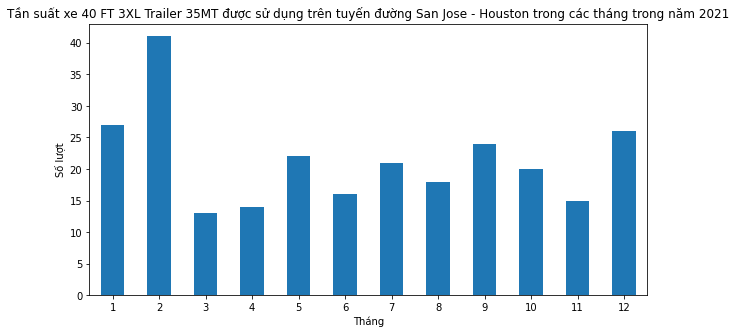

In [12]:
# biểu đồ tần suất xe '40 FT 3XL Trailer 35MT' được sử dụng trên tuyến đường 'San Jose - Houston' trong các tháng trong năm 2021
df[(df['vehicleType'] == '40 FT 3XL Trailer 35MT') & (df['route'] == 'San Jose - Houston')].RECEIVERS_DATE.dt.month.value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.xlabel('Tháng')
plt.ylabel('Số lượt')
plt.title('Tần suất xe 40 FT 3XL Trailer 35MT được sử dụng trên tuyến đường San Jose - Houston trong các tháng trong năm 2021')
plt.xticks(rotation=0)
plt.show()